# Nivel del agua del Lago Nicaragua basado en Altimetria satelital
https://www.pecad.fas.usda.gov/cropexplorer/global_reservoir/gr_regional_chart.aspx?regionid=ca&reservoir_name=Nicaragua   
4/28/2018.  
10/21, 2/21,1/14/2017. 10/4,2/2016

4/28/2018: Usando mi environment conda `vectorenv_mpl2`

In [1]:
%matplotlib inline
import os

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matplotlib.style.use('ggplot')

*Seria muy util anadir un mapa estatico del lago, usando un "basemap" estandard, y el punto lat-lon del lago o la linea de transito del sensor. Como un mapa de `folium` pero estatico.*

## Leer los datos directamente del internet, y procesarlos

### Lectura de los datos

In [3]:
fname = 'lake0351.TPJOJ.2.smooth.txt'  # Antes era 'lake0351.TPJO.2.smooth.txt'

In [4]:
durl = "http://www.pecad.fas.usda.gov/lakes/images/"

fpth_or_url = durl + fname

*Esta otra forma se utilizaria para leer un archivo local, pre-bajado del internet:*
```python
dpth = '<mi_directorio_camino>'
fpth_or_url = os.path.join(dpth, fname)
```

In [5]:
df0 = pd.read_csv(fpth_or_url, names=['date', 'hour', 'min', 'height'],
                  skiprows=11, sep='\s+')
len(df0)

1007

In [6]:
df0.head(3)

,date,hour,min,height
0,19921002,14,54,-0.22
1,19921012,12,52,-0.05
2,19921022,10,51,-0.08


In [7]:
df0.tail(3)

,date,hour,min,height
1004,20180410,7,49,0.11
1005,20180420,5,48,0.06
1006,99999999,99,99,999.99


In [8]:
df0.dtypes

date        int64
hour        int64
min         int64
height    float64
dtype: object

### Limpiar y procesar los datos

In [9]:
df = df0[(df0['date'] != 99999999) & (df0['height'] < 999)].copy()
len(df)

980

In [10]:
df.iloc[[0, -1]]

,date,hour,min,height
0,19921002,14,54,-0.22
1005,20180420,5,48,0.06


In [11]:
# Time *must* be zero-padded in conversion from integer to string
df.insert(1, 'DateTime', 
          pd.to_datetime(df['date'].map(str) 
                         + df['hour'].map(lambda nbr: "{0:02d}".format(nbr))
                         + df['min'].map(lambda nbr: "{0:02d}".format(nbr)),
                         format='%Y%m%d%H%M')
          )

In [12]:
df.drop(['date', 'hour', 'min'], axis=1, inplace=True)

In [13]:
df.iloc[[0, -1]]

,DateTime,height
0,1992-10-02 14:54:00,-0.22
1005,2018-04-20 05:48:00,0.06


In [14]:
df['year'] = df.DateTime.dt.year
df['month'] = df.DateTime.dt.month
df['day'] = df.DateTime.dt.day
df['doy'] = df.DateTime.dt.dayofyear

## Figura basica de la serie temporal

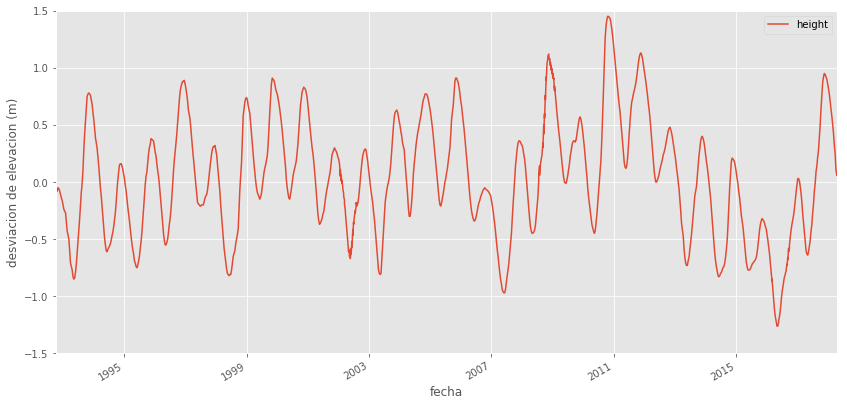

In [15]:
df.plot(x='DateTime', y='height', ylim=(-1.5, 1.5), figsize=(14, 7))

plt.ylabel('desviacion de elevacion (m)')
plt.xlabel('fecha');

## Otras figuras mas avanzadas

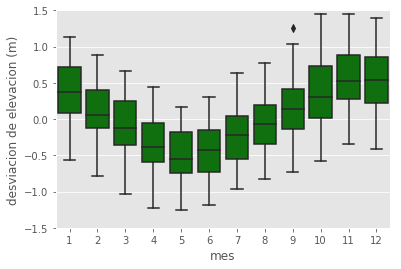

In [16]:
sns.boxplot(x='month', y='height', data=df, color='g')

plt.ylim(-1.5, 1.5)
plt.ylabel('desviacion de elevacion (m)')
plt.xlabel('mes');

In [17]:
dfg = df.groupby('year')

dfheightrange = dfg.height.max() - dfg.height.min()

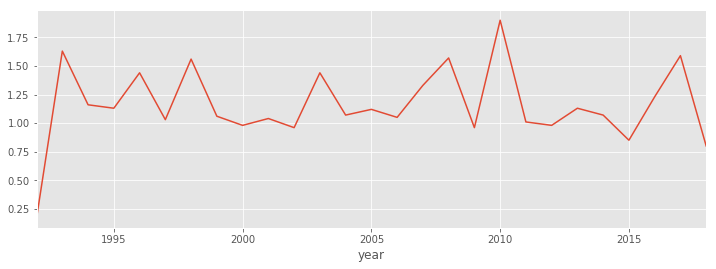

In [18]:
dfheightrange.plot(figsize=(12,4));

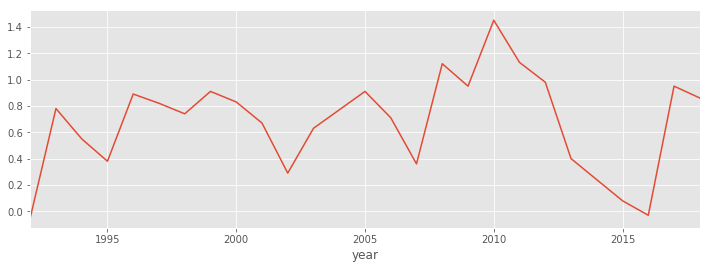

In [19]:
dfg.height.max().plot(figsize=(12,4));

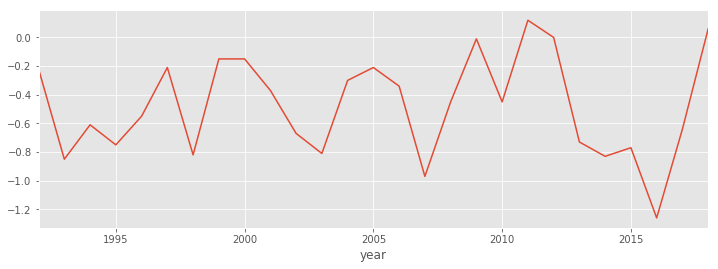

In [20]:
dfg.height.min().plot(figsize=(12,4));